In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
np.array??

In [3]:
import tarfile
import urllib

In [4]:
DIABETES_PATH = os.path.join("datasets","C:\jupiter_notebook\datasets")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [5]:
def load_diabetes_data(diabetes_path=DIABETES_PATH):
    csv_path = os.path.join(diabetes_path,"diabetes.csv")
    return pd.read_csv(csv_path)
    

In [6]:
data = load_diabetes_data()
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
%matplotlib inline

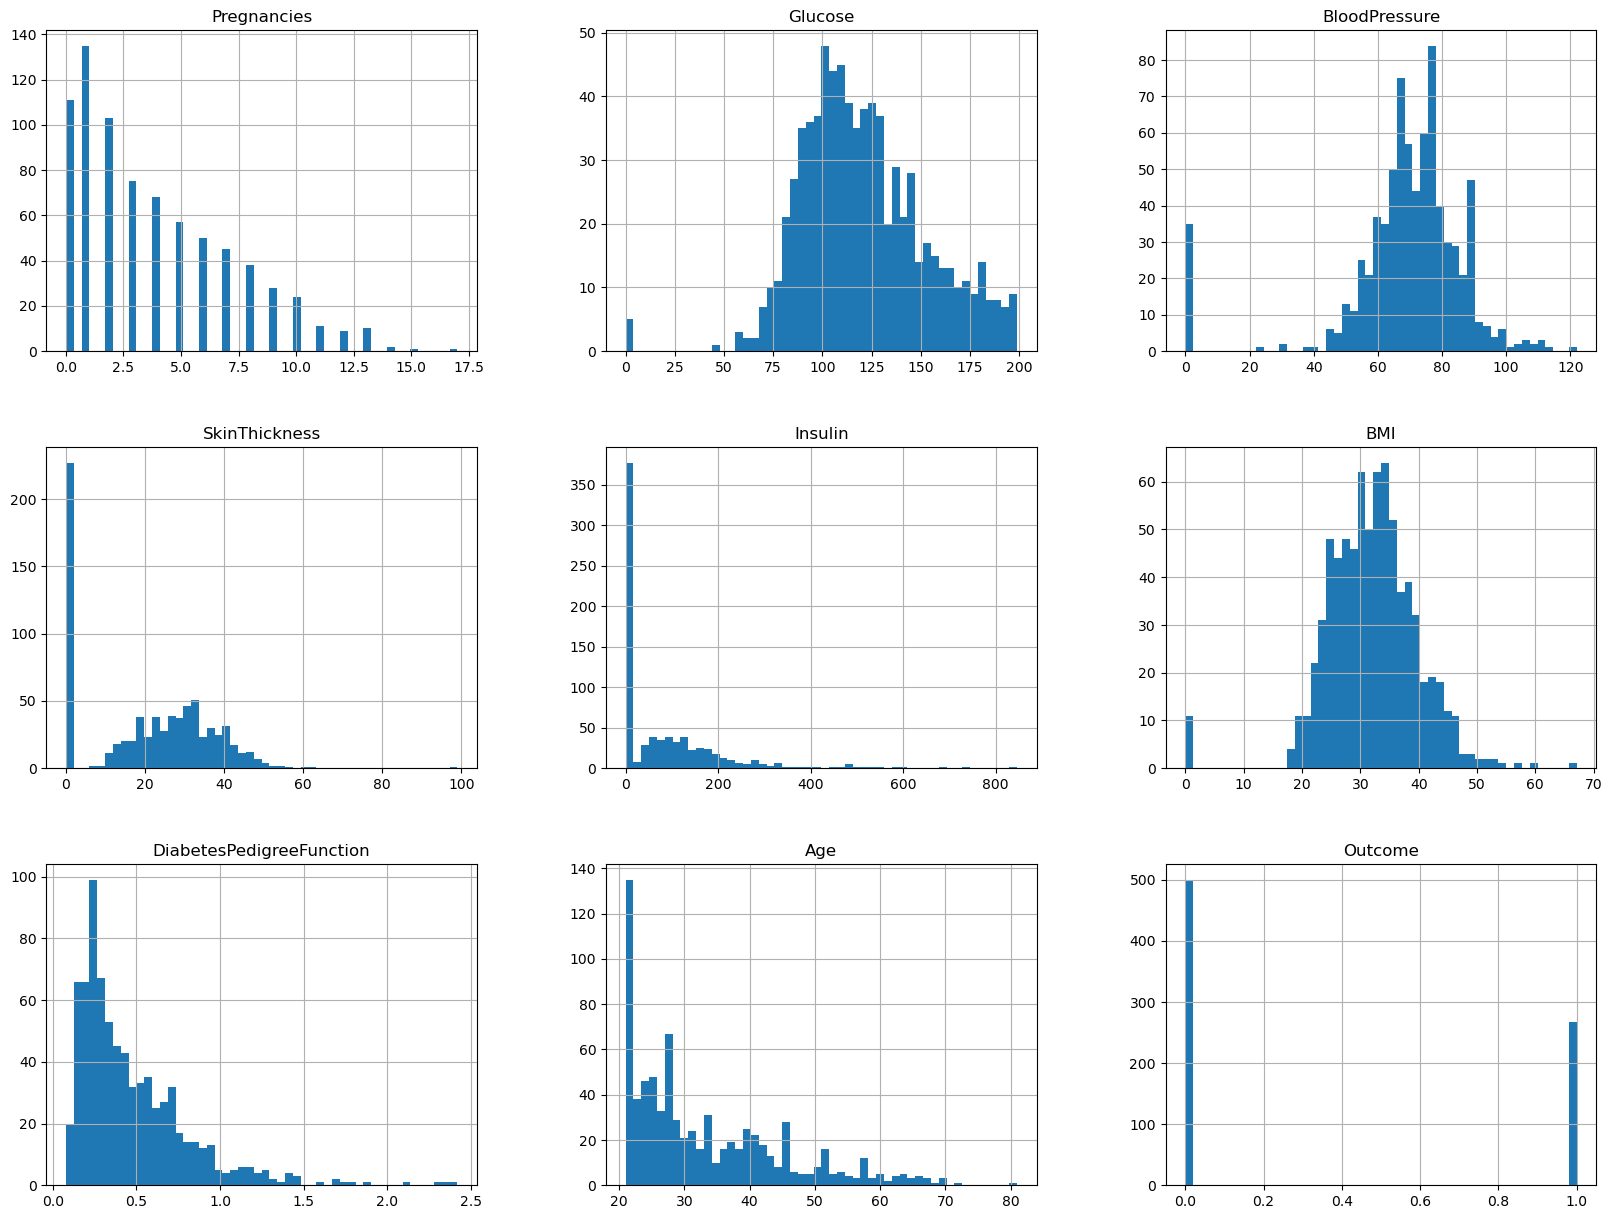

In [11]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [12]:
print("Diabetes percent", ((data.Outcome == 1).sum())/len(data)*100)
print("Median glucose level:", data.Glucose.min(),data.Glucose.max())
print("Median insulin level:", data.Insulin.min(),data.Insulin.max() )
print("Median diabetes pedigree function:", data.DiabetesPedigreeFunction.min(),data.DiabetesPedigreeFunction.max() )

Diabetes percent 34.89583333333333
Median glucose level: 0 199
Median insulin level: 0 846
Median diabetes pedigree function: 0.078 2.42


In [13]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

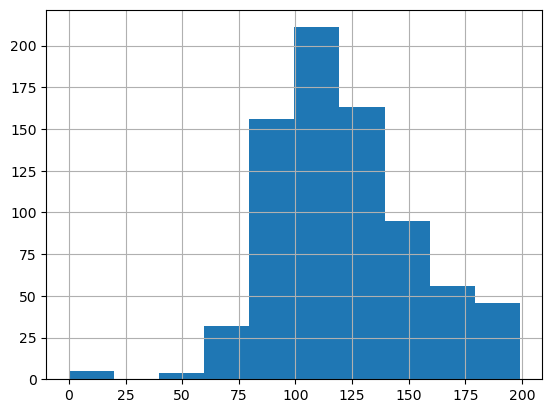

In [14]:
data['Glucose'].hist();

In [15]:
data['glucose_category'] = pd.cut(data['Glucose'],bins=[-0.5,50,100,150,201,  np.inf],labels=[1,2,3,4,5])

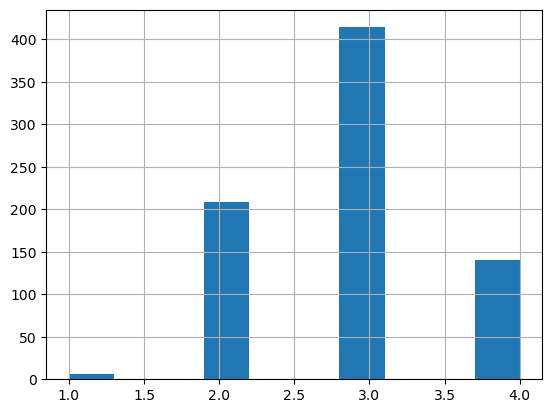

In [16]:
data.glucose_category.hist();

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['glucose_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[566 703  73  46 643   5 113 380  23 739 545 333 220 175  89 355 185  83
 578 396 212 348 495 217 697  13 710 670 117 201 424 238 627 471 467  97
 211 138  44 760 491 372 646 248 519 651  96 561 652 162 730  24 350  37
 187  22 208 698 384 603 589 648 297 224 549 137  60 727 722 307 573  99
 126 249 368 352 764 656 475  68 407 340 752 392 430 620 587 526 679 320
 284 493 409 128 745 315 281 440 624  80 147 686 669 594 262 449 618 546
 680 749 435 662 748  27 114 682 577 676 413 683 257 376 758 168 462 487
 165 459 436 156 447 734 461 378 513 664 169 109 714 718 499 272  75 533
 264 560 401 498 383 607  15 765 639 339 269 337 590 360 452 701  85  48
 316  91 381  79 154 332 456 500 492 252 369  92 254 548 759 241 524 142
 336 136 450 438 568 308 412 694 118 509 755 215 625  88 311 366  40 247
 387 233 386  94  59 314 520 290 188 133 540 153  19 515 173 106 178 599
 414 591 382 632 481 371 512 580  25 693 455 630  42 190 628 388 232  45
 319 555 334 706  98 593 189  31  72 539 200 433 12

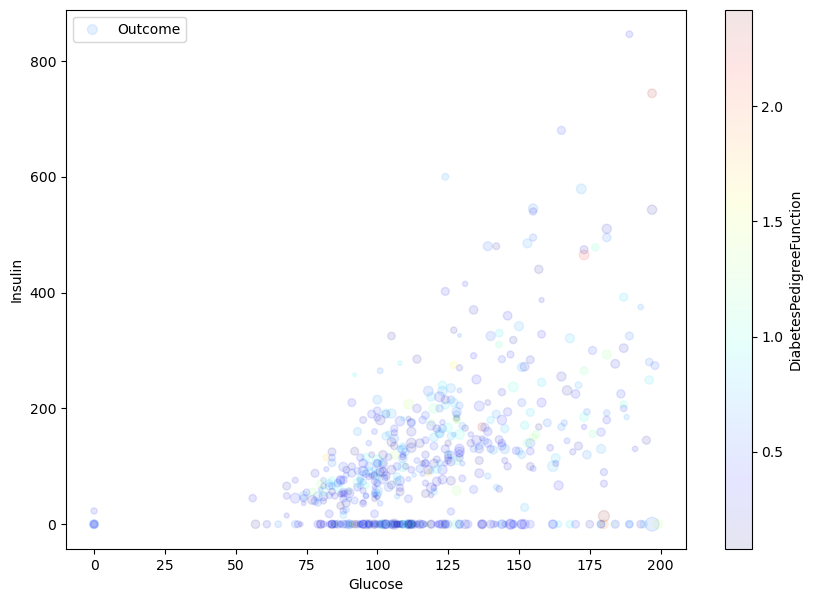

In [18]:
data.plot(kind='scatter',x='Glucose',y = 'Insulin',alpha = 0.1,s=data['SkinThickness'],label='Outcome',figsize=(10,7),c='DiabetesPedigreeFunction',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Glucose'>

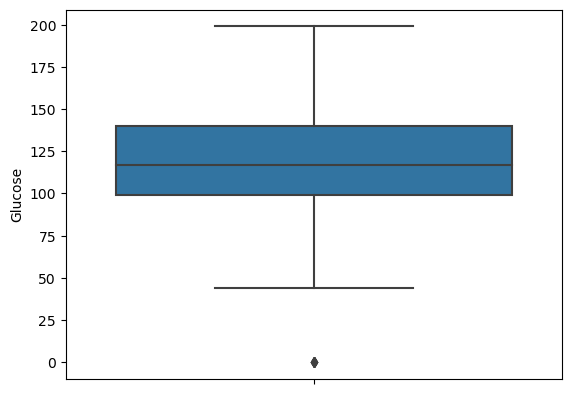

In [20]:
sns.boxplot(y = 'Glucose', data= data)

In [21]:
corr_matrix = data.corr()
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

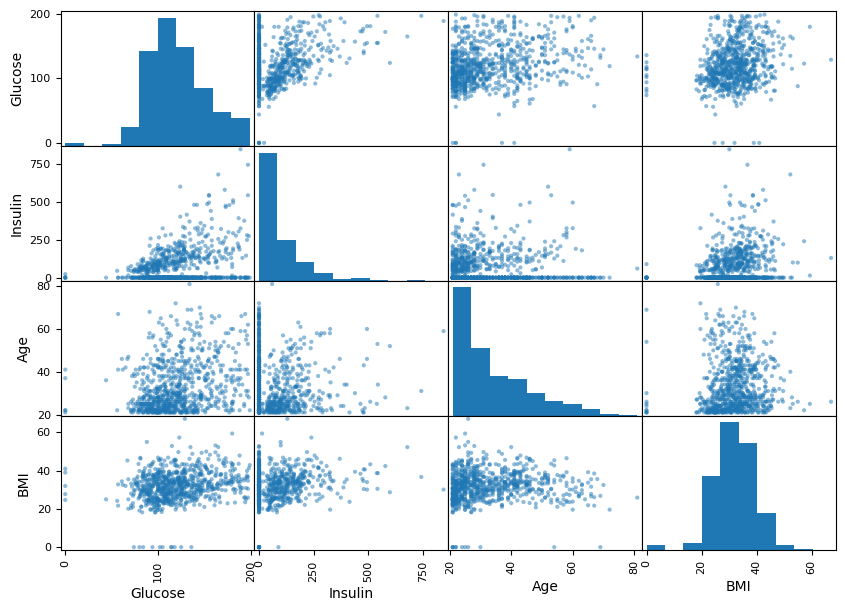

In [22]:
from pandas.plotting import scatter_matrix

attributes = ['Glucose','Insulin','Age','BMI']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

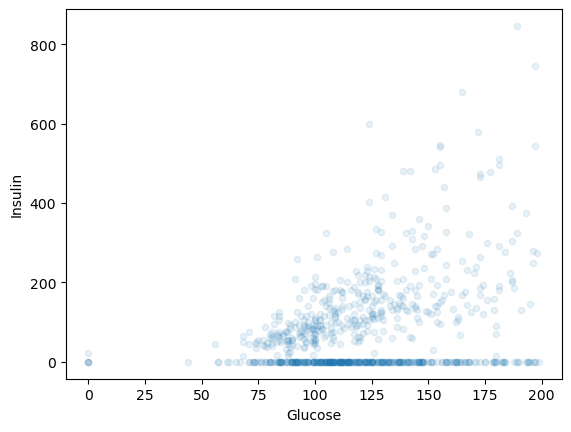

In [23]:
data.plot(kind='scatter',x='Glucose',y='Insulin',alpha=0.1)

In [24]:
data['Pressure_per_Age'] = data['BloodPressure'] / data['Age']
data['Glucose_per_Pressure'] = data['Glucose'] / data.BloodPressure
data['SkinThickness_per_Age'] = data['SkinThickness'] / data.Age

In [25]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome glucose_category  \
0                       0.627   50        1                3   
1                       0.351   31        0                2   
2                       0.672   32        1                4   
3                       0.167   21        0                2   
4                       2.288   33        1                3   
..                        ...  ...      ...              ...   
763                     0.171   63        0                3   
764                     0.340   27        0                3   
765                     0.245   30        0                3   
766                     0.349   47        1                3   
767                     0.315   23        0                2   

     Pressure_per_Age  Glucose_per_Pressure  SkinThickness_per_Age  
0            1.440000              2.055556               0.700000  
1            2.129032              1.287879               0.935484  
2            2.000000              2.859375               0.000000  
3            3.142857              1.348485               1.095238  
4            1.212121              3.425000               1.060606  
..                ...                   ...                    ...  
763          1.206349              1.328947               0.761905  
764          2.592593              1.742857               1.000000  
765          2.400000              1.680556               0.766667  
766          1.276596              2.100000               0.000000  
767          3.043478              1.328571               1.347826  

[768 rows x 13 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   glucose_category          768 non-null    category
 10  Pressure_per_Age          768 non-null    float64 
 11  Glucose_per_Pressure      768 non-null    float64 
 12  SkinThickness_per_Age     768 non-null    float64 
dtypes: category(1), float64(5), int64(7)
memory usage:

In [27]:
corr_matrix = data.corr()
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Glucose_per_Pressure        0.765258
Outcome                     0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
SkinThickness_per_Age      -0.032510
Pressure_per_Age           -0.096052
Name: Glucose, dtype: float64

In [28]:
needed_features = ['Glucose_per_Pressure''Insulin','Age','BMI','BloodPressure ',]

In [29]:
data = strat_train_set.drop('Glucose',axis=1)
diabetes_labels = strat_train_set['Glucose'].copy()

#  ЛР2. 

P.S. Ниже упражнений приведено решение задачи методами, обозначенными на собрании по лабораторной работе №2. 

In [30]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')


In [31]:
data_num = data.drop('glucose_category', axis = 1)
data_num = data_num.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
imp.fit(data_num)
imp.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [32]:
X = imp.transform(data_num)

In [33]:
data_tranformed = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_tranformed

Pregnancies  BloodPressure  SkinThickness  Insulin   BMI  \
0            1.0           72.0           30.0     18.0  38.6   
1            2.0            0.0            0.0      0.0  38.5   
2            4.0           86.0           20.0    270.0  35.1   
3            1.0           56.0            0.0      0.0  29.7   
4            4.0            0.0            0.0      0.0  28.0   
..           ...            ...            ...      ...   ...   
609          0.0           70.0            0.0      0.0  37.9   
610         10.0           78.0           31.0      0.0  27.6   
611          3.0           56.0           39.0      0.0  30.1   
612          0.0           80.0            0.0      0.0  32.4   
613          5.0           78.0            0.0      0.0  33.7   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.412  21.0      0.0  
1                       0.304  41.0      0.0  
2                       0.231  23.0      0.0  
3                       0.564  29.0      0.0  
4                       0.610  31.0      0.0  
..                        ...   ...      ...  
609                     0.334  28.0      1.0  
610                     0.512  45.0      0.0  
611                     0.557  30.0      0.0  
612                     0.601  27.0      0.0  
613                     0.218  65.0      0.0  

[614 rows x 8 columns]

In [34]:
data_category = data[['glucose_category']]
data_category

glucose_category
566                2
703                3
73                 3
46                 3
643                2
..               ...
280                3
34                 3
256                3
564                2
148                3

[614 rows x 1 columns]

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [36]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:10]

array([[1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [37]:
ordinal_encoder.categories_

[array([1, 2, 3, 4], dtype=int64)]

In [38]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
data_category_one_hot = onehotEnconder.fit_transform(data_category)
data_category_one_hot.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [39]:
#Конвейризация

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [42]:
data_num_transformed

array([[-0.83763343,  0.13275705,  0.56499727, ..., -0.1715028 ,
        -1.0371198 , -0.73932367],
       [-0.53616395, -3.64876603, -1.27927878, ..., -0.50113653,
         0.6772201 , -0.73932367],
       [ 0.066775  ,  0.86805321, -0.04976141, ..., -0.72394452,
        -0.86568581, -0.73932367],
       ...,
       [-0.23469448, -0.70758141,  1.11828009, ...,  0.27106101,
        -0.26566684, -0.73932367],
       [-1.1391029 ,  0.55292628, -1.27927878, ...,  0.40535624,
        -0.52281783, -0.73932367],
       [ 0.36824447,  0.44788398, -1.27927878, ..., -0.76362265,
         2.73442798, -0.73932367]])

In [43]:
from sklearn.compose import ColumnTransformer
num_attributes = list(data_num)
cat_attributes = ['glucose_category']

full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
    ("cat", OneHotEncoder(),cat_attributes)
])


data_prepared = full_pipeline.fit_transform(data)

# Обучение модели

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_prepared,diabetes_labels)

LinearRegression()

In [45]:
some_data = data.iloc[:5]
data_labels = diabetes_labels.iloc[:5]
data_prepared_some = full_pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [ 87.02003008 123.39067831 121.8971529  120.82094798  88.11625336]
Метки: [99, 129, 129, 146, 90]


In [46]:
from sklearn.metrics import mean_squared_error

data_prepared = full_pipeline.transform(data)
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(diabetes_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

12.354754696899084


In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,diabetes_labels)

DecisionTreeRegressor()

In [48]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(diabetes_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


In [49]:
#Кросс-валидация

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor,data_prepared,diabetes_labels,scoring='neg_mean_squared_error') # функция считает utility функцию или функцию качества, которая является противоположностью функции потерь

scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [17.26079255 17.74732317 16.94107435 18.9185245  18.65629591]
Среднее: 17.90480209349598
Стандартное отклонение: 0.7695057040686564


In [52]:
lin_scores = cross_val_score(model,data_prepared,diabetes_labels,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Оценки: [12.84729833 12.99961362 11.26674558 11.97086688 12.31912358 12.48481855
 13.2700654  13.68611134 12.99494995 12.27937638]
Среднее: 12.611896960572642
Стандартное отклонение: 0.6612394995219629


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,diabetes_labels)
forest_rmse = mean_squared_error(diabetes_labels, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(model, data_prepared,diabetes_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

4.8840891048756285
Оценки: [12.95139974 11.50072597 12.53789047 13.55877071 12.84736639]
Среднее: 12.679230655035747
Стандартное отклонение: 0.6759861937063342


In [54]:
#GridSearch - Fine-tunning

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,diabetes_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [57]:
cv_res = grid_search.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

17.709739341234464 {'max_features': 2, 'n_estimators': 3}
15.31778802616947 {'max_features': 2, 'n_estimators': 10}
15.059743118022086 {'max_features': 2, 'n_estimators': 30}
16.228180494646864 {'max_features': 4, 'n_estimators': 3}
14.203574495713555 {'max_features': 4, 'n_estimators': 10}
13.611929020768677 {'max_features': 4, 'n_estimators': 30}
15.055791810162805 {'max_features': 7, 'n_estimators': 3}
13.877634725285116 {'max_features': 7, 'n_estimators': 10}
13.401258852450907 {'max_features': 7, 'n_estimators': 30}
16.969138874591035 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
14.843097221243472 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
14.675844741761821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
16.600709910577585 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
14.33726095108017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
14.214005252762977 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
16

In [58]:
#

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
display(feature_importances)
extra_attributes = ["Gluc_per_Press", 'Press_per_Age', "Skin_per_Age"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attributes + cat_one_hot_attribs
display(sorted(zip(feature_importances,attributes),reverse=True))

array([0.0146926 , 0.02127414, 0.01672616, 0.02536225, 0.02800214,
       0.02791659, 0.03518309, 0.02098242, 0.05023595, 0.12242715,
       0.17188929, 0.46530821])

[(0.46530820932038675, 1),
 (0.17188929266488132, 'Skin_per_Age'),
 (0.12242715369271201, 'Press_per_Age'),
 (0.050235947992615014, 'Gluc_per_Press'),
 (0.03518309241305065, 'Age'),
 (0.028002136233547206, 'BMI'),
 (0.027916588771606753, 'DiabetesPedigreeFunction'),
 (0.025362254409817122, 'Insulin'),
 (0.02127414384991685, 'BloodPressure'),
 (0.020982424326928744, 'Outcome'),
 (0.01672615739322813, 'SkinThickness'),
 (0.014692598931309574, 'Pregnancies')]

In [60]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('Glucose',axis=1)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


y_test = strat_test_set['Glucose'].copy()
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

X_test_preprocessed = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_preprocessed)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

12.108959391578518


In [61]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([10.88588516, 13.21935321])

In [62]:
#Упражнения

In [63]:
#Упражнение 1.

In [64]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf',gamma='scale',C = 0.1)
svr_model.fit(data_prepared,diabetes_labels)
print("Raw estimations:")
svr_squared_errors = mean_squared_error(diabetes_labels, svr_model.predict(data_prepared))
svr_rmse_score = np.sqrt(svr_squared_errors)
display_scores(svr_rmse_score)
print("cross val score")
scores = cross_val_score(svr_model,data_prepared,diabetes_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

Raw estimations:
Оценки: 30.83119254876065
Среднее: 30.83119254876065
Стандартное отклонение: 0.0
cross val score
Оценки: [31.57926982 29.77328371 29.97577001 29.67231298 35.00194989]
Среднее: 31.200517279784684
Стандартное отклонение: 2.0232030693086047


In [65]:
svr_predictions = svr_model.predict(X_test_preprocessed)
svr_mse = mean_squared_error(y_test,svr_predictions)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

29.844228133673347


In [66]:
svr_params = [
    {
        'kernel':['linear'], 'C':[0.01,0.1,1,10,100]
    },
    {
        'kernel':['rbf'],'C':[0.01,0.1,1,10,100],'gamma':['scale',0.1,0.01,0.001,0.0001]
    },
]
model = SVR()
grid_search_svr = GridSearchCV(model,param_grid=svr_params,cv=5, scoring='neg_mean_squared_error',return_train_score=True,n_jobs= -1,verbose=2)
grid_search_svr.fit(data_prepared,diabetes_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [67]:
grid_search_svr.best_params_

{'C': 100, 'kernel': 'linear'}

In [68]:
cv_res = grid_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

29.966442892256776 {'C': 0.01, 'kernel': 'linear'}
23.152107650788892 {'C': 0.1, 'kernel': 'linear'}
16.967731400713934 {'C': 1, 'kernel': 'linear'}
14.51364855628971 {'C': 10, 'kernel': 'linear'}
12.91863315633116 {'C': 100, 'kernel': 'linear'}
32.321075274428445 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
32.318477286043475 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
32.40313434411853 {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
32.44789632271664 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
32.45334045480654 {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
31.266045947413986 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
31.239595468107158 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
31.98322098328789 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
32.39343295159044 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
32.44778372992369 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
25.9759384483032 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
25.86407492314743 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
28.809

In [69]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  12.91863315633116


In [70]:
#Упражнение 2

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,expon
params_distribution = {
    'kernel':['linear','rbf'],
    'C': reciprocal(20,20000), #если мы не знаем распределение параметров, то это лучшее что мы можем предложить (log нормальное распределение) https://en.wikipedia.org/wiki/Reciprocal_distribution
    'gamma':expon(scale=1.0) # предположили, что параметр имеет экспоненциальное распределение
}
model = SVR()
randomized_search_svr = RandomizedSearchCV(svr_model,param_distributions=params_distribution,n_iter=50,cv = 5,scoring='neg_mean_squared_error',verbose=2 ,random_state=42,n_jobs =-1)
randomized_search_svr.fit(data_prepared,diabetes_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(C=0.1), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020F4A865790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020F4CAFD880>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
randomized_search_svr.best_params_

{'C': 84.11142374014415, 'gamma': 0.838636245624803, 'kernel': 'linear'}

In [73]:
cv_res = randomized_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

12.90973566891043 {'C': 265.8583788632432, 'gamma': 3.010121430917521, 'kernel': 'linear'}
24.52540365137194 {'C': 4366.193678104918, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
17.05405048248917 {'C': 58.750769152656574, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
12.911809936495247 {'C': 200.5191380457913, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
30.831255441713793 {'C': 23.055974256464793, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
13.536714118354373 {'C': 13082.421055385465, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
20.76673820767117 {'C': 70.99757664393003, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
13.307495729317417 {'C': 21.000465008462697, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
20.34917541412668 {'C': 1369.584019114956, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
23.23336414850268 {'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
12.903975001326046 {'C': 4534.797304756079, 'gamma': 0.2227358621286903, 'kernel': '

In [74]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  12.91863315633116


In [75]:
#Упражение 3

In [76]:
k = 5

In [77]:
def select_top_k_features(features,k):
    return np.sort(np.argpartition(np.array(features), -k)[-k:])

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
class TopFeatureSelection(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importance,k):
        self.feature_importance = feature_importance
        self.k = k
    def fit(self,X, y = None):
        self.feature_indices_ = select_top_k_features(self.feature_importance,k)
        return self
    def transform(self,X,y=None):
        return X[:,self.feature_indices_]

In [79]:
changed_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('feature_selection', TopFeatureSelection(feature_importances,k))
])

In [80]:
#Упражнение 4

In [81]:
final_pipeline = Pipeline([
    ('preprocessing', changed_pipeline),
    ('model', LinearRegression())
])

final_pipeline.fit(data,diabetes_labels)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Pregnancies',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                 

In [82]:
some_data = data[:4]
some_labels = diabetes_labels[:4]
predictions = final_pipeline.predict(some_data)
print("Predictions: ",predictions)
print("Actual Predictions: ",some_labels)
mse = mean_squared_error(some_labels,predictions)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

Predictions:  [ 87.09209081 123.4953035  120.30555047 121.36880148]
Actual Predictions:  566     99
703    129
73     129
46     146
Name: Glucose, dtype: int64
RMSE:  14.614969877351808


In [83]:
#Упражнение 5

In [84]:
params = [{
'preprocessing__preprocessing__num__imputer__strategy':['mean','median','most_frequent'],
'preprocessing__feature_selection__k':list(range(1, len(feature_importances) + 1))
}]

grid_search = GridSearchCV(final_pipeline,params,cv = 5,scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(data,diabetes_labels)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, prep

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=2, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=2, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=2, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=2, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=2, preprocessing__preprocessing__num__imputer_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=3, preprocessing__preprocessing__num__

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=median; tot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=4, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=5, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=5, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=5, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=5, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=5, preprocessing__preprocessing__num__imputer_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=6, preprocessing__preprocessing__num__

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=median; t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=7, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=8, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=9, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=9, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=9, preprocessing__preprocess

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=10, preprocessing__preprocessing__num__imputer__strategy=m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=media

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=11, preprocessing__preprocessing__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=12, preprocessing__preprocessing__num__imputer__

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('std_scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['Pregnancies',
                                                                                           'BloodPressure',
                              

In [85]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Pregnancies',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                  

In [86]:
grid_search.best_params_

{'preprocessing__feature_selection__k': 1,
 'preprocessing__preprocessing__num__imputer__strategy': 'mean'}

In [87]:
np.sqrt(-grid_search.best_score_)

12.869940300328794

# Задача классификации

Нам нужно разделить набор данных на объекты и целевые переменные. Следуя популярной методике, мы называем фрейм данных с функциональными переменными как X, а фрейм с целевой переменной как Y.

In [88]:
def load_diabetes_data(diabetes_path=DIABETES_PATH):
    csv_path = os.path.join(diabetes_path,"diabetes.csv")
    return pd.read_csv(csv_path)


In [89]:
df = load_diabetes_data()
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [90]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

Оценим полную картину зависимостей пераметров от диагноза

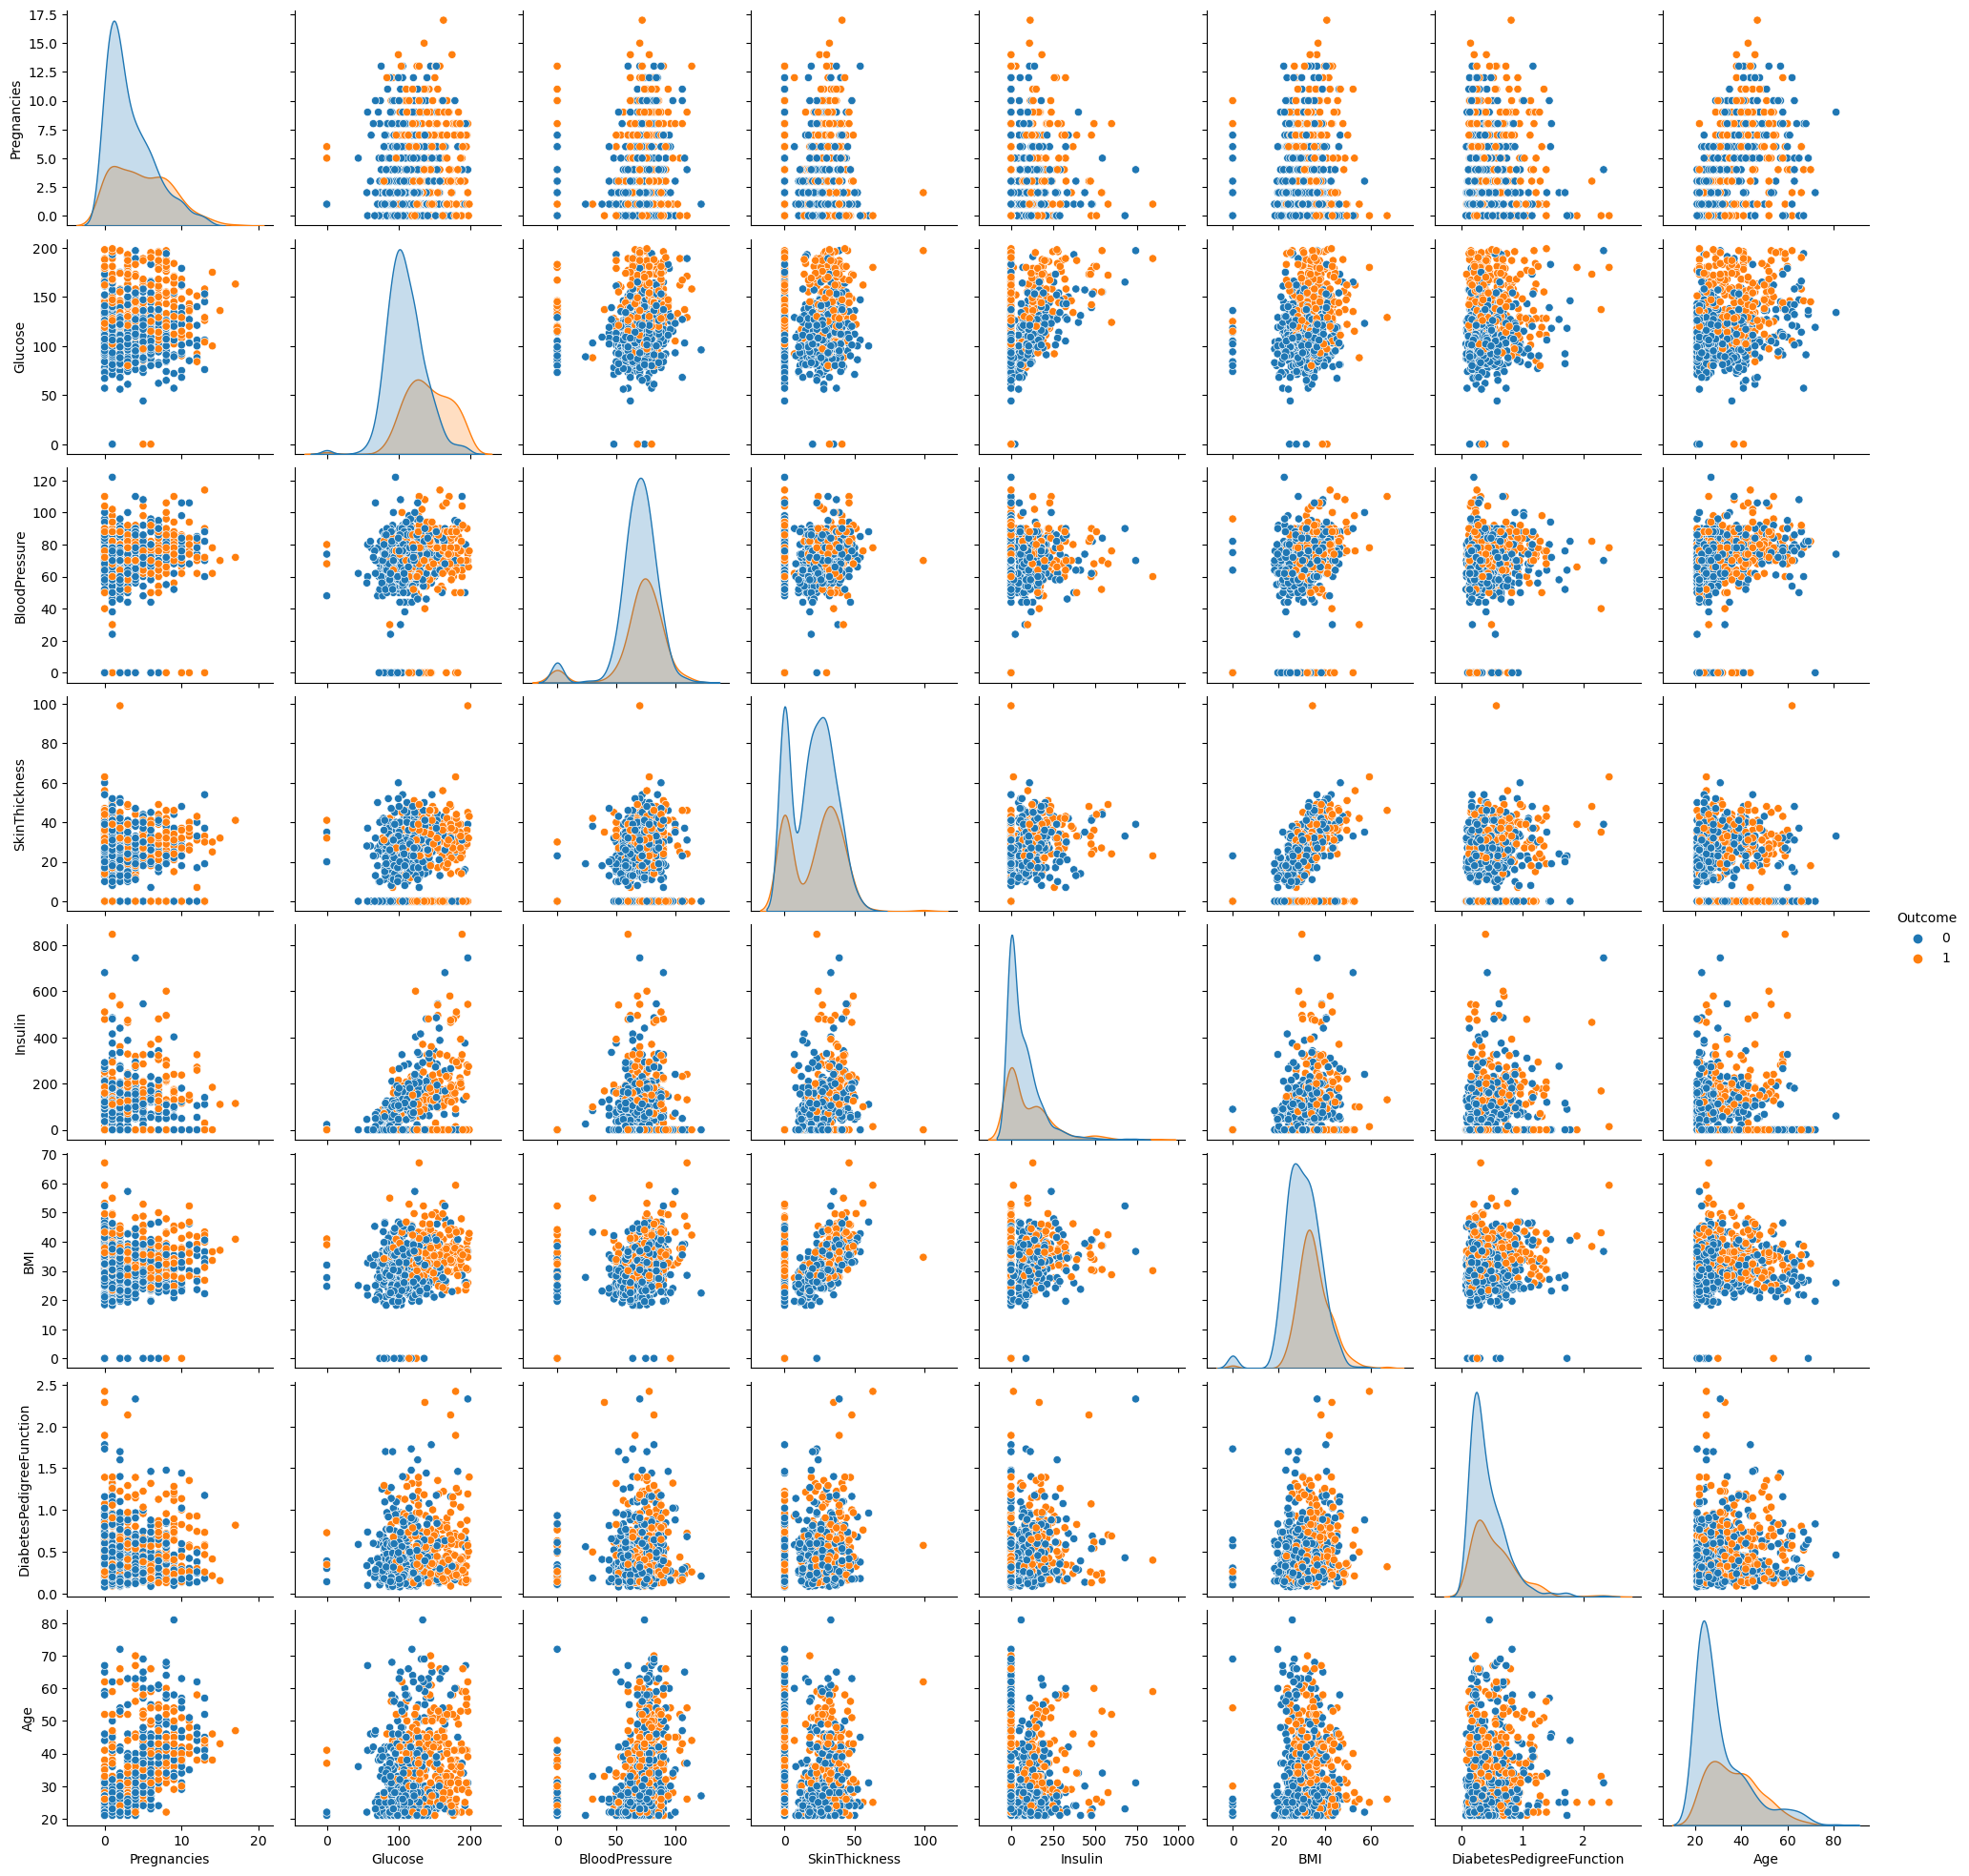

In [91]:
sns.pairplot(df,hue= 'Outcome')

Используя train_test_split от sklearn, разделим фреймы данных объекта (X) и цели (y) на обучающий набор (80%) и тестовый набор (20%). Обучающий набор используется для построения классификационной модели, а тестовый набор используется для оценки производительности модели.

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

Перед реализацией алгоритма классификации мы масштабируем переменные объектов нашего набора данных с помощью функции sklearn StandardScaler(). Эта функция стандартизирует характеристики, удаляя среднее значение и масштабируя до единичной дисперсии.

In [93]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

### Обучение и оценка модели

Будем использовать простую модель машинного обучения, называемую классификатором случайных лесов. Обучаем модель стандартным параметрам, используя обучающий набор данных. Обученная модель сохраняется как “rcf”. Оцениваем производительность нашей модели, используя тестовый набор данных. Наша модель имеет точность классификации 79,9%.

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.7857142857142857

### Построение границ принятия решений

### Метод "случайного леса"

График границ решения хорошо работает только с двумя функциями. Наши данные содержат восемь функций, но мы все равно можем определить границы принятия решений, выбрав, какие функции использовать. Строим границу принятия решения для каждого из двух возможных признаков и смотрим, насколько хорошо модель классифицирует пациентов.

In [95]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


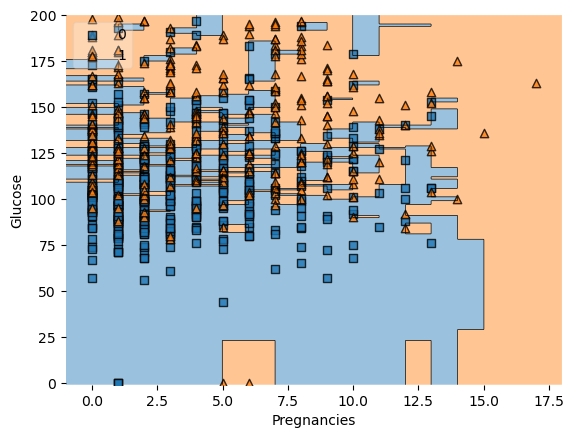

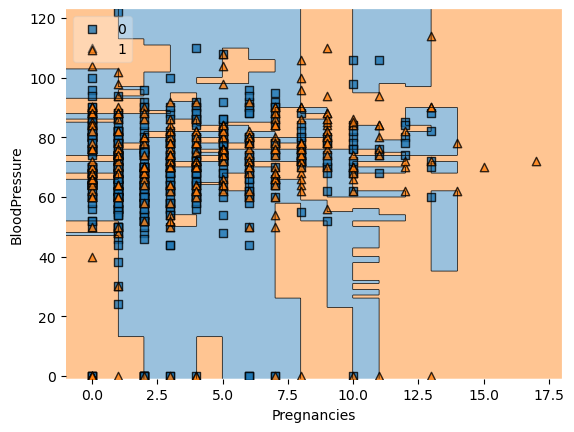

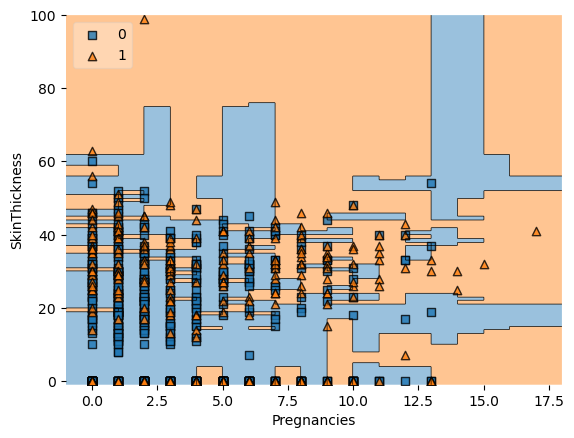

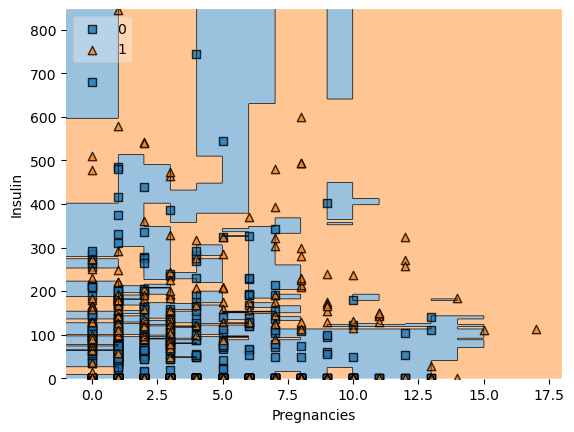

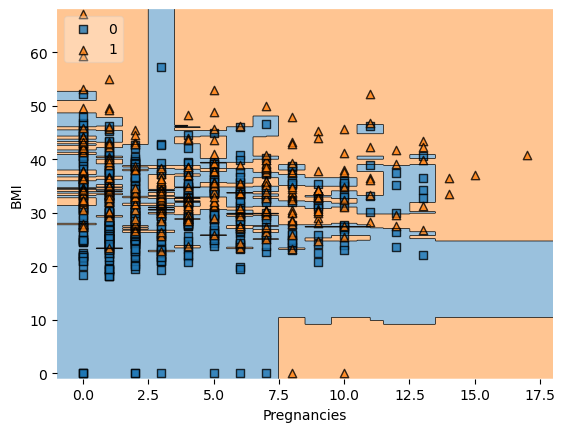

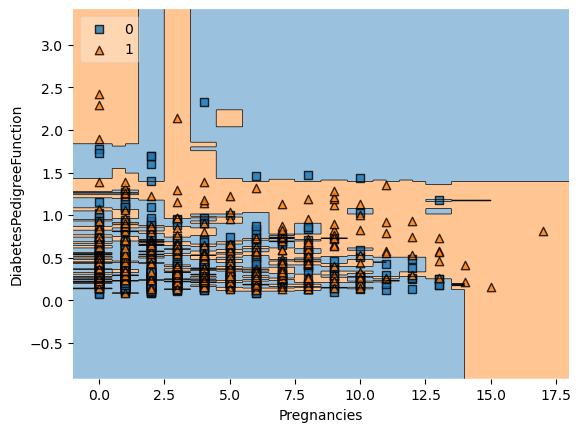

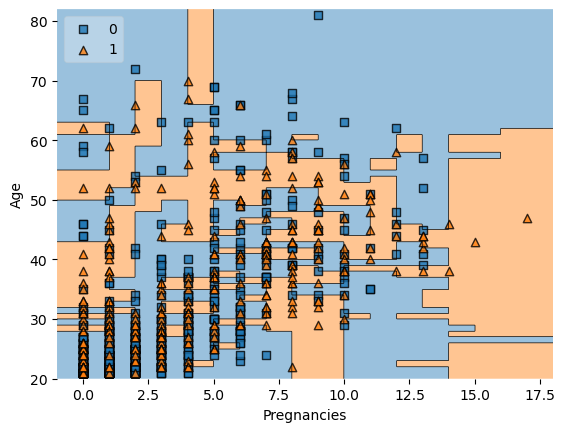

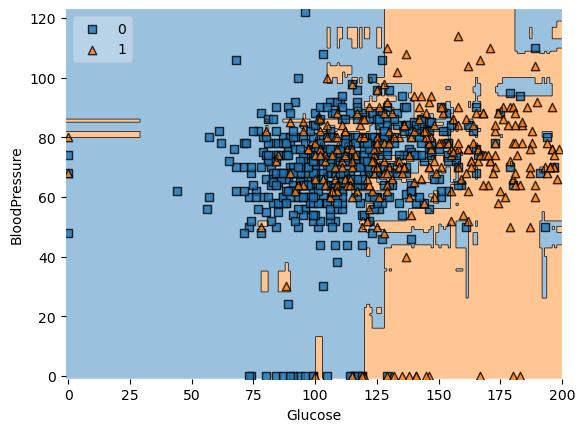

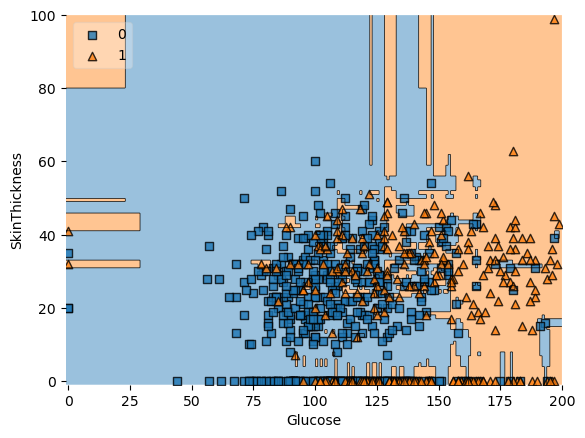

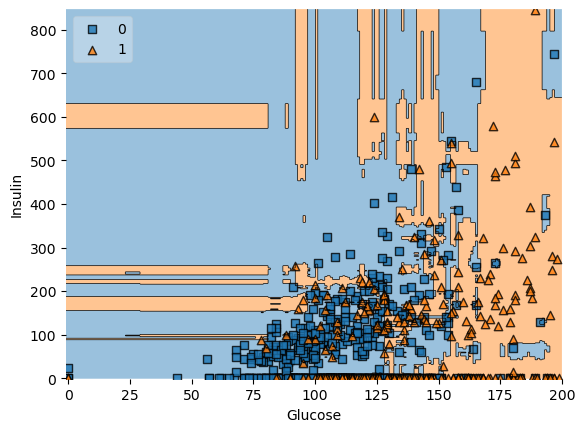

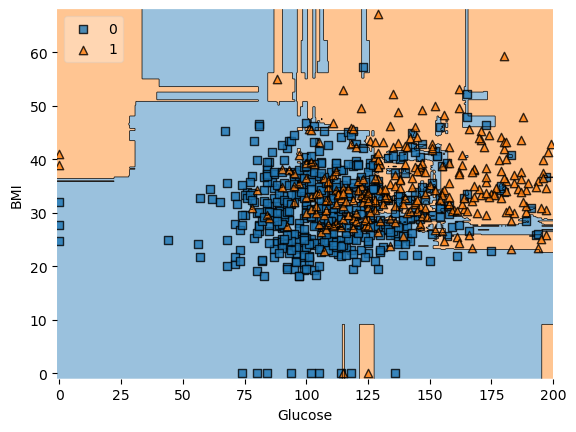

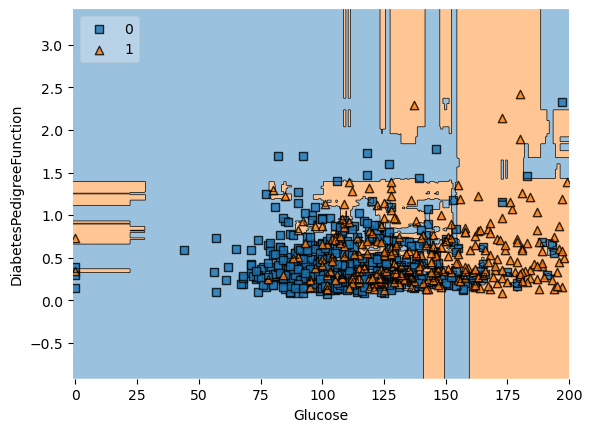

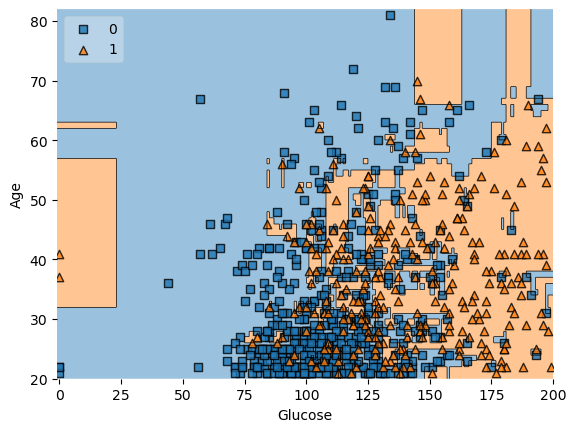

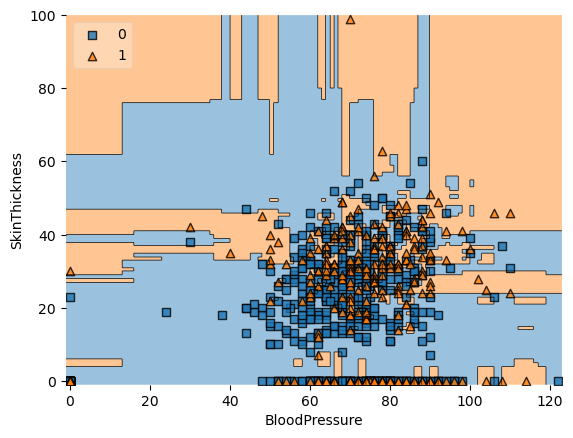

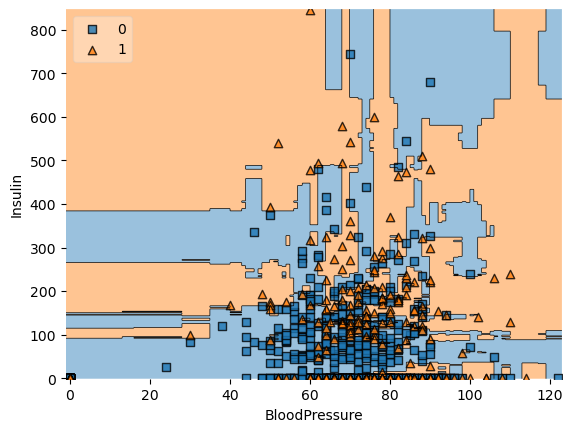

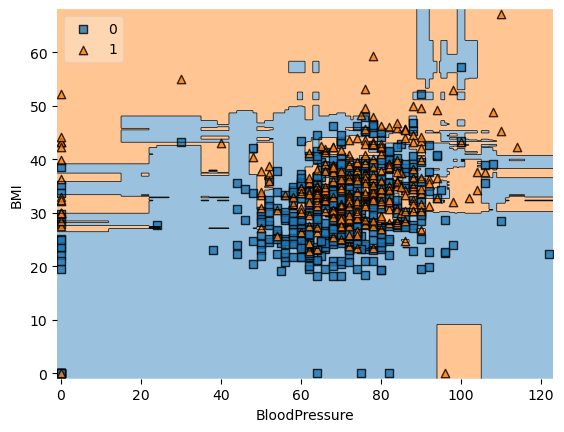

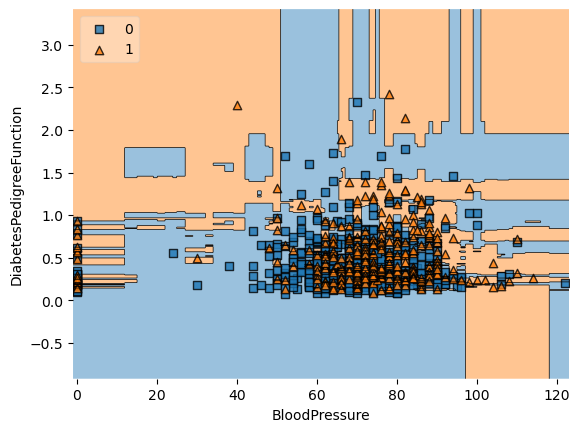

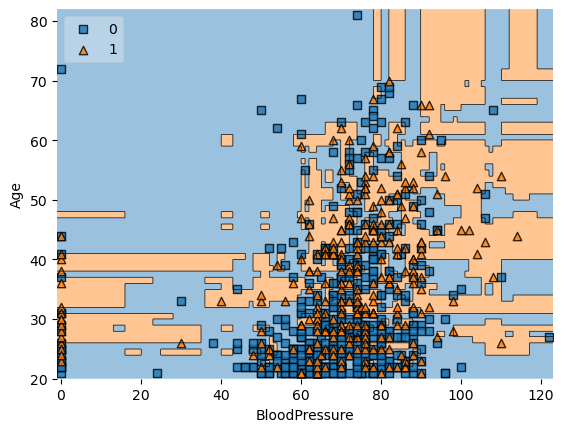

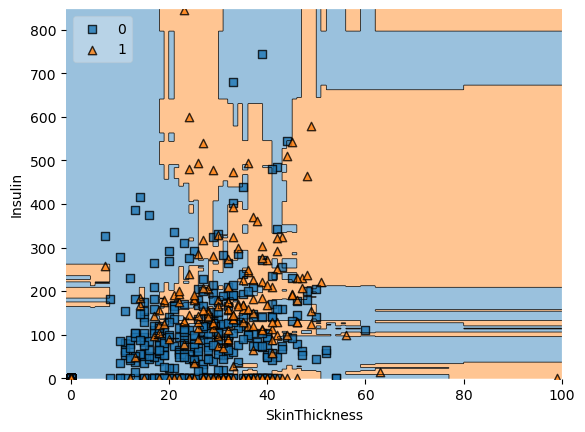

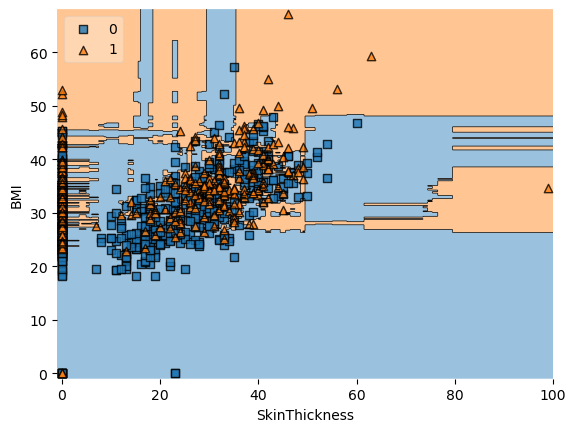

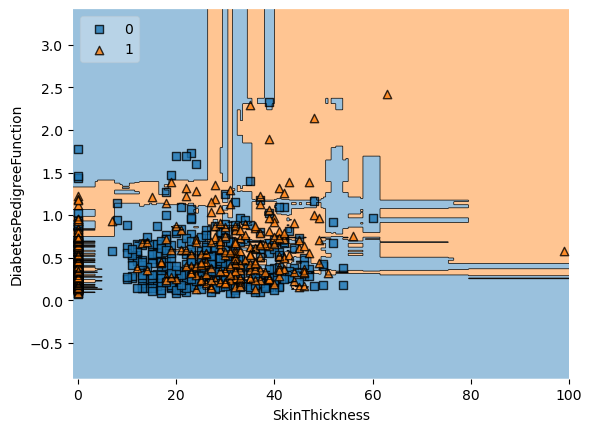

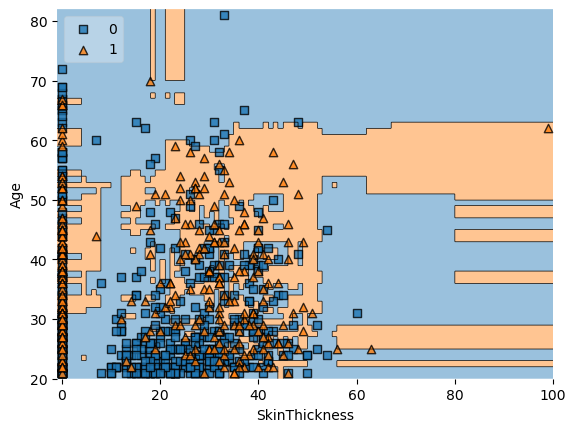

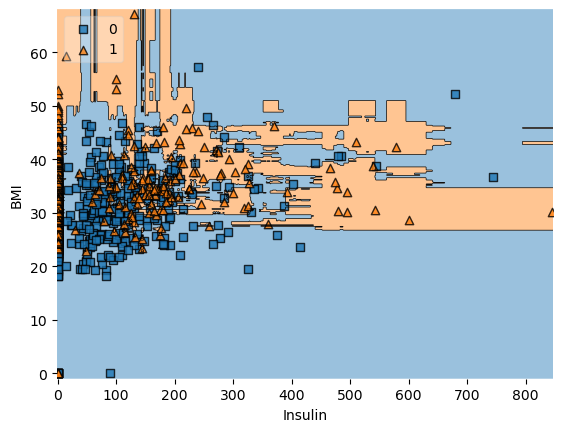

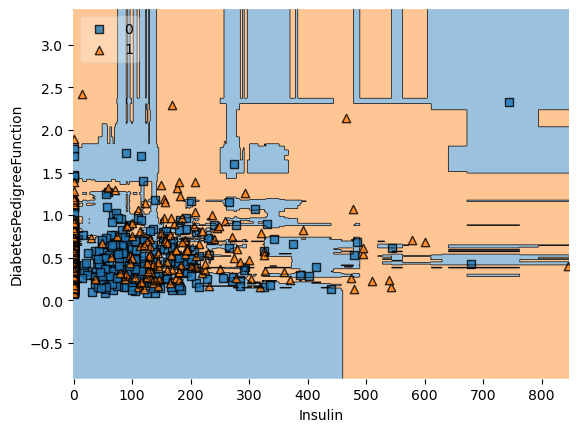

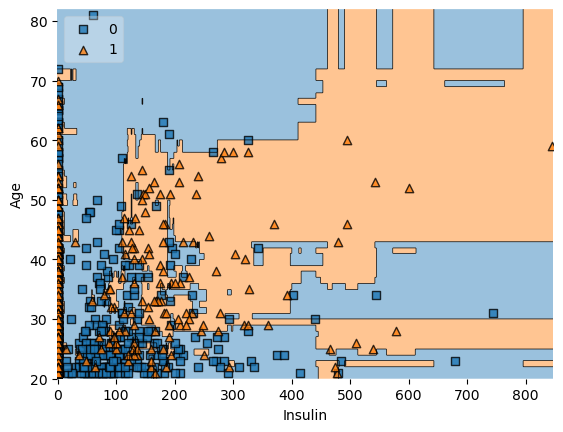

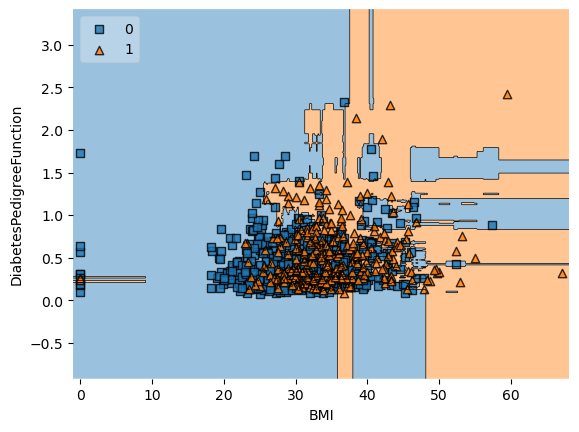

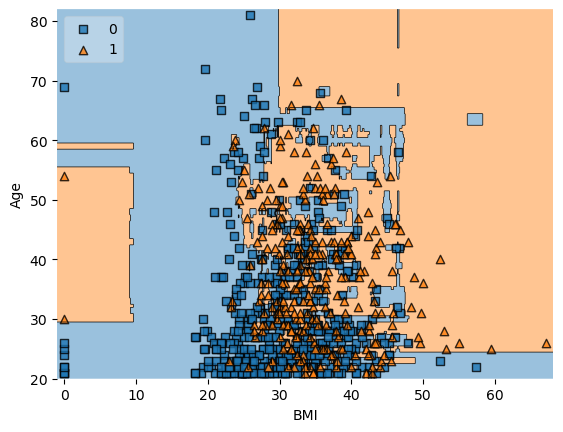

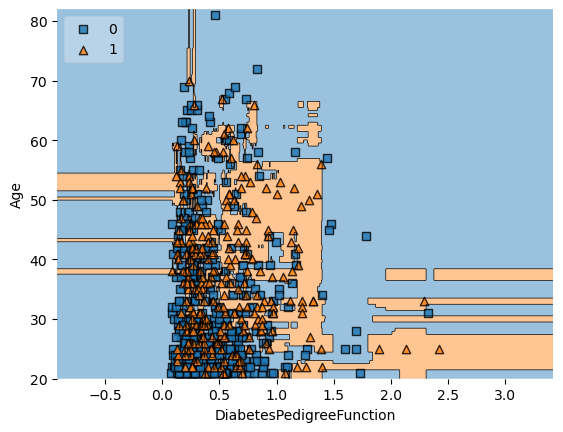

In [96]:
from mlxtend.plotting import plot_decision_regions
def classify_with_rfc(X,Y):
    x = df[[X,Y]].values
    y = df['Outcome'].astype(int).values
    rfc = RandomForestClassifier()
    rfc.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=rfc, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])

Распределения показывают, что наша модель действительно хорошо классифицирует пациентов. Детальная оценка:


### Confusion matrix

<AxesSubplot:>

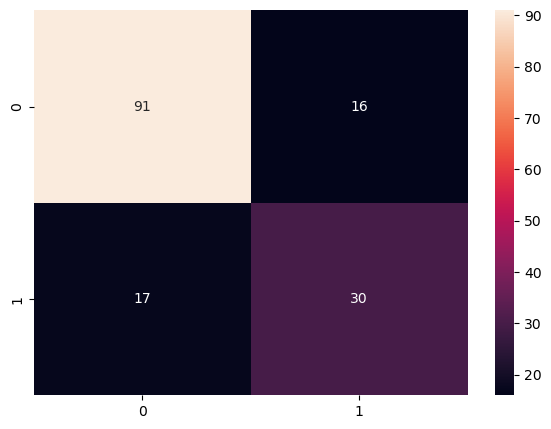

In [104]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

In [105]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.84      0.85      0.85       107
      Normal       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154



### ROC curve

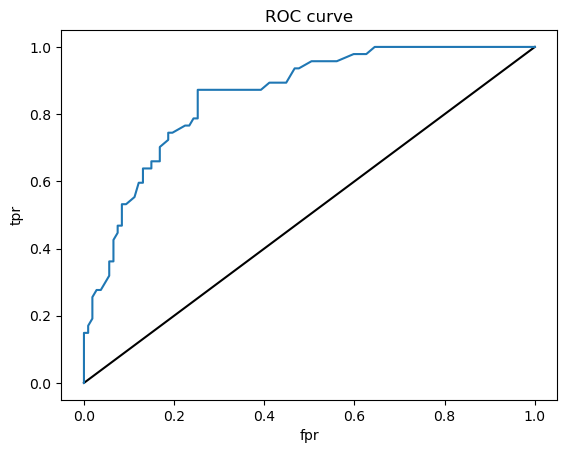

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8546430701928812

Для нашей модели площадь под кривой рабочих характеристик приемника (ROC AUC) составляет 85%. Это означает, что модель классификации достаточно хороша для выявления пациента с диабетом.

### Метод "К-ближайших соседей"

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [110]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Оценка, полученная в результате тестирования по тем же точкам данных, которые использовались для обучения

In [111]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


Оценка, полученная в результате тестирования точек данных, которые были разделены в начале и использовались исключительно для тестирования

In [112]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.78125 % and k = [7]


### Визуализация результатов

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


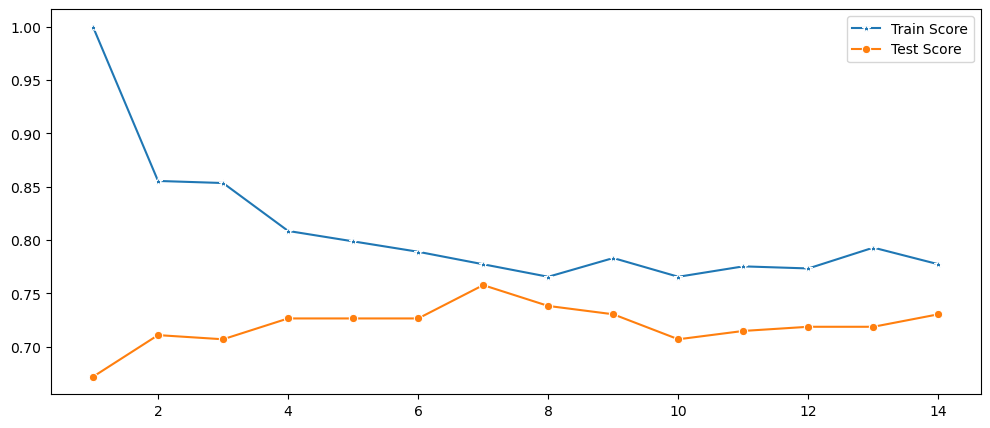

In [114]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Наилучший результат фиксируется при k = 7, следовательно, 7 используется для окончательной модели

In [115]:
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7578125

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ACer\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


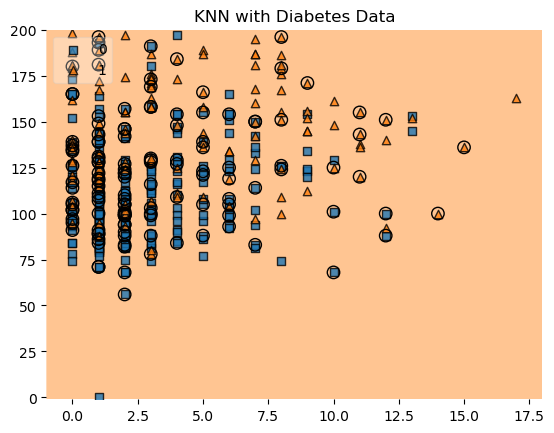

In [116]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

### Confusion Matrix

Получим прогнозы, используя классификатор, который мы подобрали выше

In [117]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted    0   1  All
True                   
0          144  23  167
1           39  50   89
All        183  73  256

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 23.52222222222222, 'Predicted label')

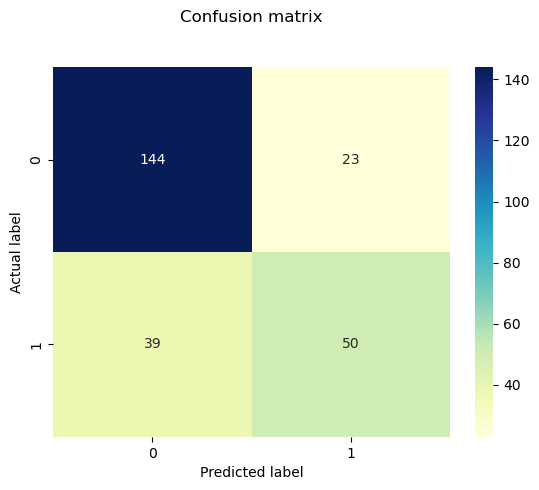

In [118]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC curve 

In [119]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

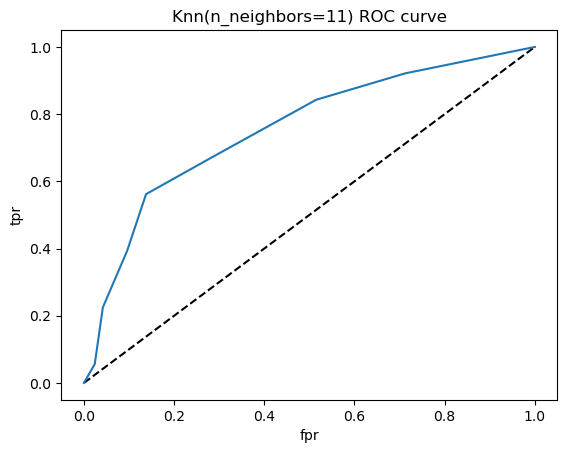

In [120]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7553656731480859

Для нашей модели площадь под кривой рабочих характеристик приемника (ROC AUC) составляет 75%. Это означает, что модель классификации достаточно хороша для выявления пациента с диабетом.